<a href="https://colab.research.google.com/github/jeremy-08-ed/PraktikumML/blob/main/LaprakML_A2_24060119130071_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tugas Praktikum 2 Machine Learning
Nama: Jeremy Edbert Widjaja<br>
NIM: 24060119130071<br>
Kelas: A2 <br>

Dataset: Breast Cancer Wisconsin (Original) Data Set<br>
URL UCI: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29<br>
URL Raw: https://raw.githubusercontent.com/jeremy-08-ed/kumpulanDataset/main/breast-cancer-wisconsin.csv



##Import Library

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

##Import Dataset

In [ ]:
url = "https://raw.githubusercontent.com/jeremy-08-ed/kumpulanDataset/main/breast-cancer-wisconsin.csv"
names = ['id', 'clump_thickness', 'uni_cell_size', 'uni_cell_shape', 'margin_adhesion', 'one_cell_size', 'bare_nuclei', 'bland_chromatin', 'nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

df.head()

,id,clump_thickness,uni_cell_size,uni_cell_shape,margin_adhesion,one_cell_size,bare_nuclei,bland_chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Terdapat 2 kelas yaitu angka **2** untuk benign dan **4** untuk malignant.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump_thickness  699 non-null    int64 
 2   uni_cell_size    699 non-null    int64 
 3   uni_cell_shape   699 non-null    int64 
 4   margin_adhesion  699 non-null    int64 
 5   one_cell_size    699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   bland_chromatin  699 non-null    int64 
 8   nucleoli         699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


Setelah dianalisis, kolom bare_nuclei ternyata bertipe object. Hal ini disebabkan karena adanya string '?' pada kolom tersebut. Untuk menyamakan tipe data, value '?' akan diubah menjadi nilai terendah pada range yang telah ditentukan pada dokumentasi dataset, yakni 1.

##Preprocessing Data

In [ ]:
# Drop kolom ID
df.drop('id', axis=1, inplace=True)

Kolom ID tidak dibutuhkan.

In [ ]:
# Replace value '?' dengan angka 1
df.replace('?', 1, inplace=True)

In [ ]:
# Mengubah tipe data menjadi int64
df = df.astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   clump_thickness  699 non-null    int64
 1   uni_cell_size    699 non-null    int64
 2   uni_cell_shape   699 non-null    int64
 3   margin_adhesion  699 non-null    int64
 4   one_cell_size    699 non-null    int64
 5   bare_nuclei      699 non-null    int64
 6   bland_chromatin  699 non-null    int64
 7   nucleoli         699 non-null    int64
 8   mitoses          699 non-null    int64
 9   class            699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


Semua kolom memiliki tipe data yang sama.

In [ ]:
df.head()

,clump_thickness,uni_cell_size,uni_cell_shape,margin_adhesion,one_cell_size,bare_nuclei,bland_chromatin,nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


##Validasi Dataset

In [ ]:
array = df.values

# ambil fitur
X = array[:, 0:9]
y = array[:, 9]

validation_size = 0.2
seed = 7

X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

##K-Folds Cross Validation

In [ ]:
seed = 7
scoring = 'accuracy'

##Membangun Model

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('DT', DecisionTreeClassifier()))

In [ ]:
results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold, scoring=scoring)
  # print(cv_results)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

KNN: 0.966006 (0.024555)
NB: 0.958831 (0.025367)
SVM: 0.967825 (0.027416)
DT: 0.930227 (0.030367)


Accuracy tertinggi dimiliki oleh model SVM sehingga untuk evaluasi modelnya akan dilanjutkan dengan model SVM.

##Evaluasi Model dengan Accuracy Tertinggi

In [ ]:
# Make predictions on validation dataset
svm = SVC()
svm.fit(X_train, y_train)
predictions = svm.predict(X_validation)
cf = confusion_matrix(y_validation, predictions)
print(accuracy_score(y_validation, predictions))
print(cf)
print(classification_report(y_validation, predictions))

0.9642857142857143
[[88  3]
 [ 2 47]]
              precision    recall  f1-score   support

           2       0.98      0.97      0.97        91
           4       0.94      0.96      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



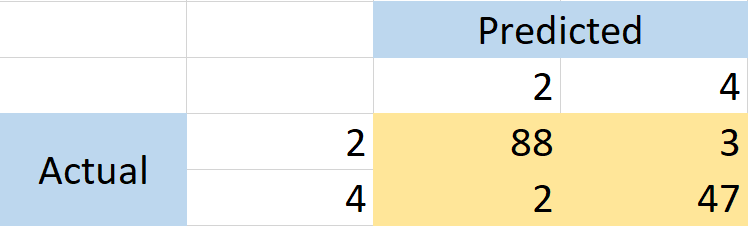

Terdapat 88 kali prediksi class 2 (benign) dan faktanya class 2 (benign) <br>
Terdapat 3 kali prediksi kelas 4 (malignant) dan faktanya class 2 (benign) <br>
Terdapat 2 kali prediksi kelas 2 (benign) dan faktanya class 4 (malignant) <br>
Terdapat 47 kali prediksi kelas 4 (malignant) dan faktanya class 4 (malignant) <br>

Sehingga bisa disimpulkan bahwa:
<ul>
  <li>TP = 88</li>
  <li>FN = 3</li>
  <li>FP = 2</li>
  <li>TN = 47</li>
</ul>

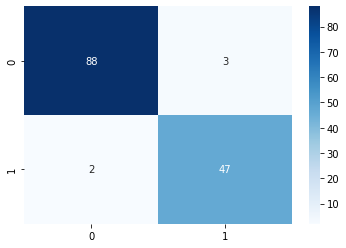

In [ ]:
sns.heatmap(cf, annot=True, cmap="Blues")

Matriks di atas diadopsi dari confusion matrix yang tadi sudah dibuat tetapi untuk ini diberikan warna supaya lebih nyaman dilihat daripada berupa array.